In [3]:
import pandas as pd
import numpy as np
import cv2
import PIL
from skimage import morphology
import matplotlib.pyplot as plt

# Load train.csv and validation.csv
y_train = pd.read_csv('train.csv')
y_validation = pd.read_csv('validation.csv')

# In the folder train, there are images with the name y_train['Id'].png with leading zeros
# In the folder validation, there are images with the name y_validation['Id'].png with leading zeros

# Load images
X_train = []
for i in y_train['Id']:
    img = cv2.imread('train/' + str(i).zfill(5) + '.png')
    X_train.append(img)

X_train = np.array(X_train)

X_validation = []
for i in y_validation['Id']:
    img = cv2.imread('validation/' + str(i).zfill(5) + '.png')
    X_validation.append(img)

X_validation = np.array(X_validation)

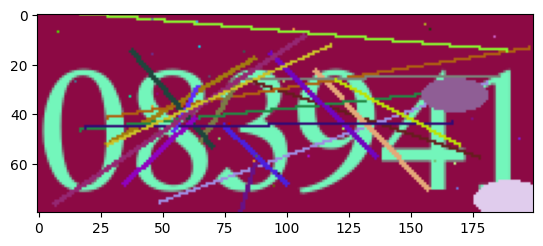

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3][:,:,::-1])

In [47]:
def remove_dots(img):
    # Convert to gray scale
    img = img.astype(np.float32)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert to CV_8U depth
    gray = cv2.convertScaleAbs(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()
    # Thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Remove small dots
    thresh = morphology.remove_small_objects(thresh, min_size=50, connectivity=2)
    # Fill holes
    thresh = morphology.remove_small_holes(thresh, area_threshold=50, connectivity=2)
    # # Label the image
    # labels = measure.label(thresh)
    # # Remove the background
    # labels = labels * (labels == np.argmax(np.bincount(labels.flat)[1:]) + 1)
    # Convert to 3 channels
    thresh = np.stack([thresh, thresh, thresh], axis=-1)
    img_no_bg = img * (1-thresh)
    img_no_bg = img_no_bg.astype(np.uint8)
    # Print the most common color in img_no_bg
    img_temp = img_no_bg.copy()
    unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
    img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]
    print('Most common color in img_no_bg:', unique[np.argmax(counts)])
    print(f'Second most common color in img_no_bg: {unique[np.argsort(counts)[-2]]} with {counts[np.argsort(counts)[-2]]} pixels')
    number_color = unique[np.argsort(counts)[-2]]
    # Make a mask for the second most common color
    mask = np.all(img_no_bg == number_color, axis=-1)
    mask = np.stack([mask, mask, mask], axis=-1)
    new_img = img * mask
    return new_img, img_no_bg


In [6]:
def most_common_colors(img, n=1):
    unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)
    return unique[np.argsort(counts)[-n]], counts[np.argsort(counts)[-n]]

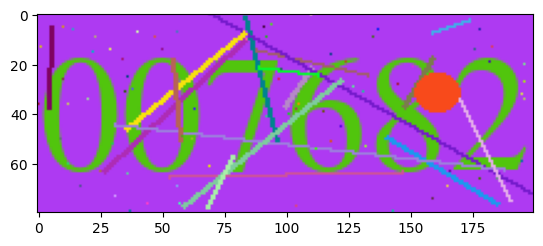

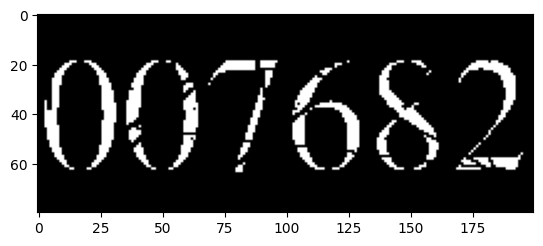

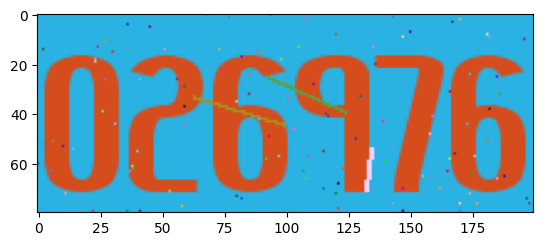

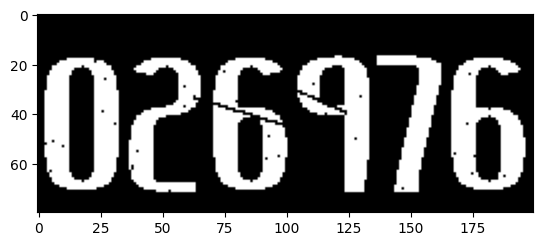

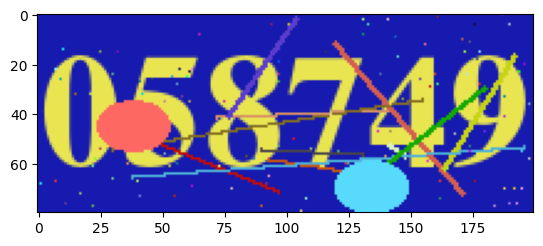

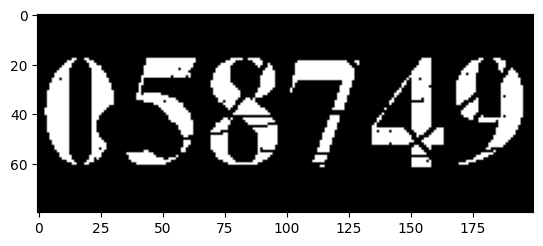

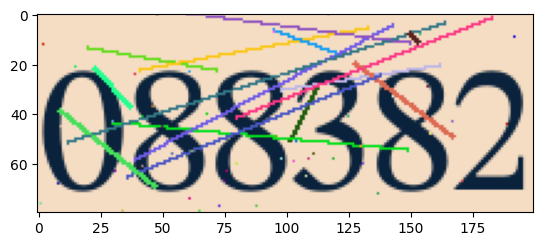

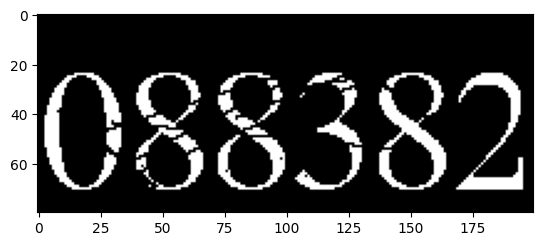

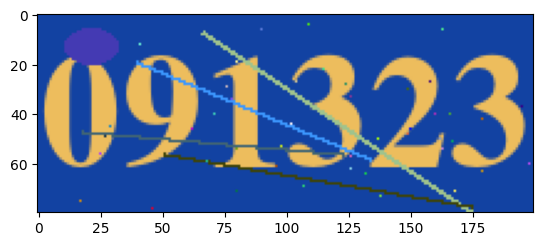

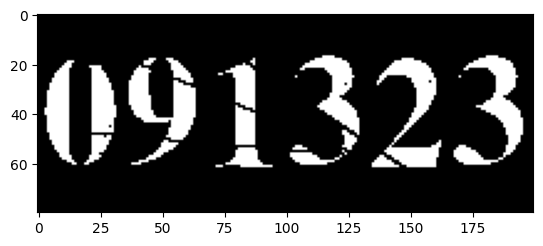

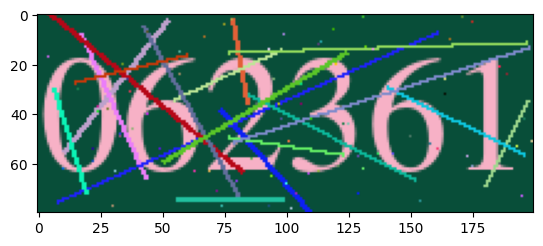

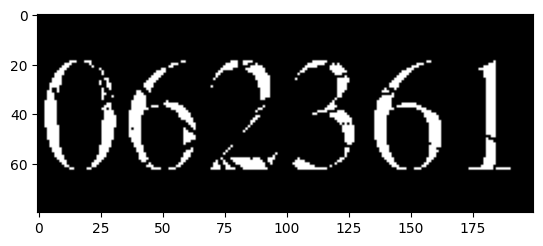

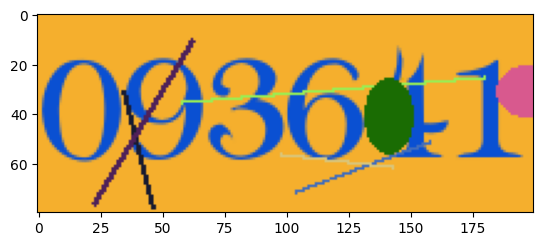

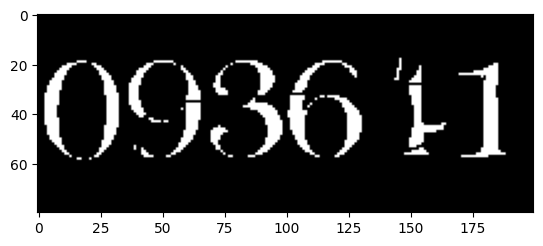

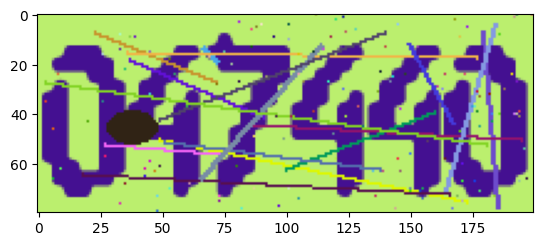

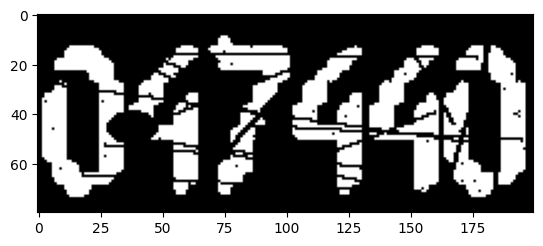

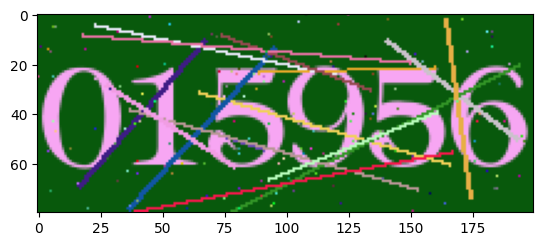

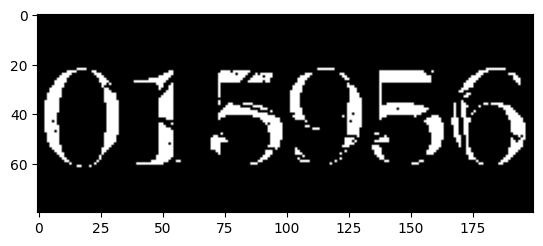

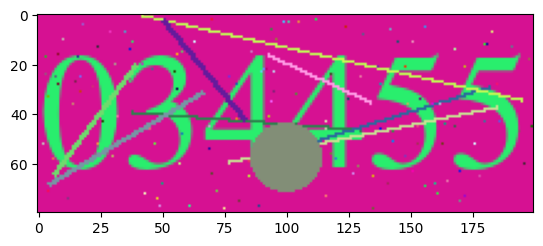

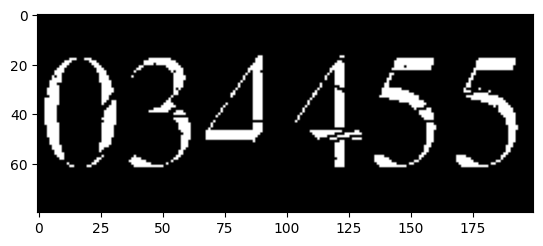

In [29]:
def get_bg_color(img):
    # Get the most common color in the top and bottom of the image
    top = img[:int(img.shape[0]/4)]
    bottom = img[int(img.shape[0]*3/4):]
    top_color, top_count = most_common_colors(top)
    bottom_color, bottom_count = most_common_colors(bottom)
    if top_count > bottom_count:
        return top_color
    else:
        return bottom_color
    
def remove_dots_v2(img, greyscale=True):
    bg_color = get_bg_color(img)
    first_color, first_count = most_common_colors(img, n=1)
    second_color, second_count = most_common_colors(img, n=2)
    if np.all(first_color == bg_color):
        num_color = second_color
    else:
        num_color = first_color
    mask = np.all(img == num_color, axis=-1)
    mask = np.stack([mask, mask, mask], axis=-1)
    new_img = img * mask
    if greyscale:
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        new_img = cv2.convertScaleAbs(new_img)
    return new_img

for n in range(10):
    plt.imshow(X_validation[n][:,:,::-1])
    plt.show()
    plt.imshow(remove_dots_v2(X_validation[n], True), cmap='gray')
    plt.show()

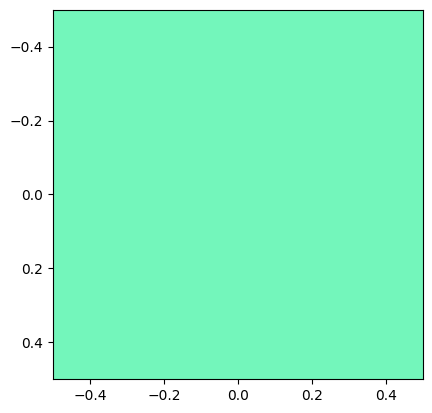

In [60]:
most_common_colors(X_train[3])
# Plot the most common color in the image
plt.imshow(most_common_colors(X_train[3],2)[0].reshape(1, 1, 3)[:,:,::-1])

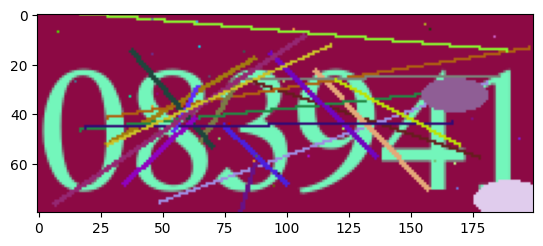

In [53]:
plt.imshow(X_train[3][:,:,::-1])

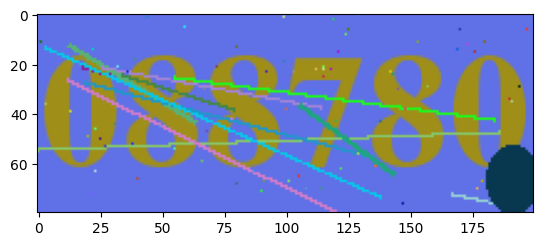

In [48]:
plt.imshow(X_train[98][:,:,::-1])

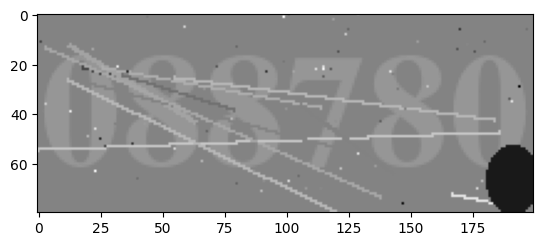

/tmp/ipykernel_17666/62520444.py:14: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  thresh = morphology.remove_small_holes(thresh, area_threshold=50, connectivity=2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Most common color in img_no_bg: [0 0 0]
Second most common color in img_no_bg: [79 56  8] with 438 pixels


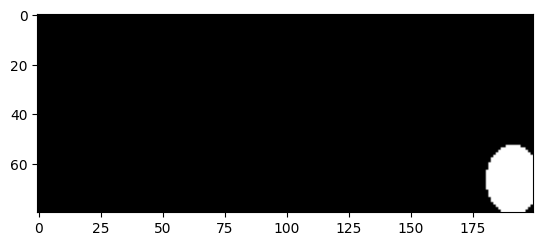

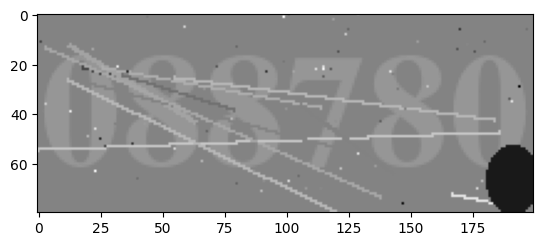

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Most common color in img_no_bg: [0 0 0]
Second most common color in img_no_bg: [79 56  8] with 438 pixels


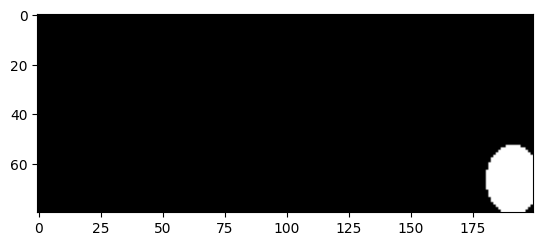

In [49]:
plt.imshow(remove_dots(X_train[98])[0].astype(np.float32)[:,:,::-1])
plt.show()
plt.imshow(remove_dots(X_train[98])[1].astype(np.float32)[:,:,::-1])
plt.show()

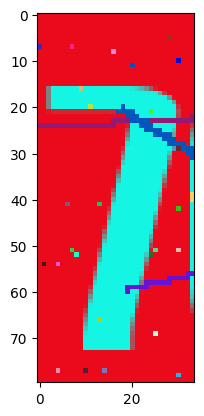

In [50]:
img = X_train[2]
# Split the image vertically in 6
img_split = np.array_split(img, 6, axis=1)

plt.imshow(img_split[1][:,:,::-1])

In [20]:
# Split the image vertically in 6 equal parts
X_train_split = np.array([np.array_split(img, 6, axis=1) for img in X_train])
X_validation_split = np.array([np.array_split(img, 6, axis=1) for img in X_validation])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (100, 6, 80) + inhomogeneous part.

In [8]:
np.array([np.array_split(i, 6, axis=1) for i in X_train])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (100, 6, 80) + inhomogeneous part.